# Importation of pyVHR (Release 0.0.3 on 2 Feb)

In [9]:
from pyVHR.analysis.testsuite import TestSuite, TestResult
from pyVHR.analysis.stats import StatAnalysis

# Comparison of the new method with traditional methods

The configuration parameters are defined in the default_test_flo.cfg file.

The result is saved in the testResults.h5 file.

In [10]:
cfgFilename = '../pyVHR/analysis/default_test_flo.cfg'

test = TestSuite(configFilename=cfgFilename)

test.start(verb=1)

** Run the test with the following config:
      dataset: UBFC2
      methods: ['CHROM', 'GREEN', 'LGI', 'PBV', 'MAP_3DCNN']

**** Using Method: CHROM on videoID: 0


c:\users\florian\appdata\local\programs\python\python38\lib\site-packages\pyVHR\signals\video.py:72: UserWarning:


WARNING!! Requested detector method is different from the saved one





   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject1\vid.avi
         Total frames: 1533
             Duration: 52.86 (sec)
           Frame rate: 29 (fps)
                Codec: rawvideo
           Num frames: 1533
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 52.863395
      Extracted faces: found! Loading...

    * CHROM params: start time = 0.0, end time = 52.9, winsize = 5.0 (sec)

    * Errors: RMSE = 3.66, MAE = 1.81, MAX = 22.94, PCC = 0.89

**** Using Method: CHROM on videoID: 1

   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject10\vid.avi
         Total frames: 2023
             Duration: 67.75 (sec)
           Frame rate: 30 (fps)
                Codec: rawvideo
           Num frames: 2023
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 67.747861
      Extracted faces: found! Loading...

    * CHROM params: start time = 0.0, end time = 55.9, winsize =


    * Errors: RMSE = 20.90, MAE = 10.08, MAX = 57.13, PCC = 0.74

**** Using Method: PBV on videoID: 0

   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject1\vid.avi
         Total frames: 1533
             Duration: 52.86 (sec)
           Frame rate: 29 (fps)
                Codec: rawvideo
           Num frames: 1533
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 52.863395
      Extracted faces: found! Loading...

    * PBV params: start time = 0.0, end time = 52.9, winsize = 5.0 (sec)

    * Errors: RMSE = 3.79, MAE = 1.89, MAX = 23.79, PCC = 0.88

**** Using Method: PBV on videoID: 1

   * Video filename: ../../../3DCNN/UBFC/DATASET_2/subject10\vid.avi
         Total frames: 2023
             Duration: 67.75 (sec)
           Frame rate: 30 (fps)
                Codec: rawvideo
           Num frames: 2023
               Height: 480
                Width: 480
             Detector: 0
            Extractor: 67.747861
      

c:\users\florian\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:2490: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['MAE', 'MAX', 'PCC', 'RMSE', 'bpmES', 'bpmGT', 'dataset', 'mask',
       'method', 'sigFilename', 'telapse', 'timeES', 'timeGT',
       'videoFilename'],
      dtype='object')]




# Display of graphs comparing methods

MAE : Mean Absolute Error

PCC : Pearson Correlation Coefficient

RMSE : Root Mean Squared Error

In [11]:
filename = "./testResults.h5"
# -- object for statistical testing 
st = StatAnalysis(filename)

# -- box plot statistics (medians)
st.displayBoxPlot(metric='MAE',scale='log')
st.displayBoxPlot(metric='PCC')
st.displayBoxPlot(metric='RMSE')

# Friedman and post-hoc tests

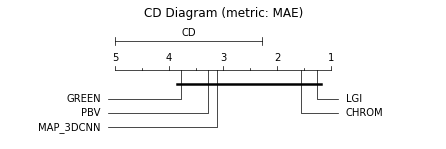

num datasets: 5
stats: 10.062762 -- p-value: 0.039384 -- CD: 2.727774


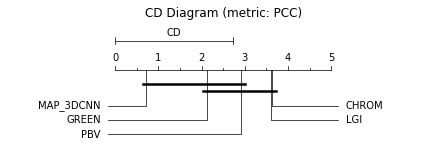

stats: 12.414023 -- p-value: 0.014524 -- CD: 2.727774


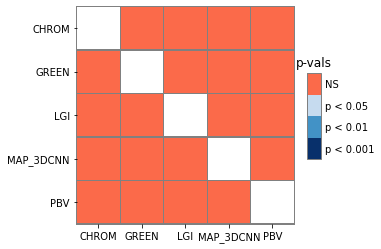

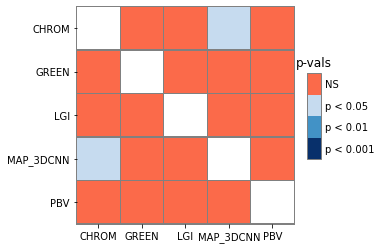

In [12]:
filename = "./testResults.h5"

# -- object for statistical testing 
st = StatAnalysis(filename)

# -- Friedman & Nemenyi tests for MAE
t,p,ranks,piv,ndataset = st.FriedmanTest(metric='MAE')

# -- critical differences diagram
cd = st.computeCD()
print('num datasets: %d' %ndataset)
print('stats: %f -- p-value: %f -- CD: %f' %(t,p,cd))

# -- Friedman & Nemenyi tests for PCC
t,p,ranks,piv,ndataset = st.FriedmanTest(metric='PCC')

# -- critical differences diagram
cd = st.computeCD()
print('stats: %f -- p-value: %f -- CD: %f' %(t,p,cd))

# -- significance plot
st.SignificancePlot(metric='MAE')
st.SignificancePlot(metric='PCC')